<a href="https://colab.research.google.com/github/vishnuvardhanvaka/Regression-torch/blob/main/Linear_regression_(y%3Dmx%2Bc).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
#importing the modules...
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt

In [88]:
# Dataset class declaration
def output(x):
  y=((-2/3)*x )+2
  return y
class Dataset(Dataset):
  def __init__(self):
    self.data=torch.FloatTensor([1,2,3,4,5,6,7,8,9,10])
  def __getitem__(self,index):
    x=torch.FloatTensor([self.data[index]])
    y=torch.FloatTensor([output(x)])
    return x,y
  def __len__(self):
    return len(self.data)

In [89]:
#hyper parameters
lr=0.01
epochs=100
in_features=1
out_features=1
batch_size=3
custom_weights=torch.tensor([0.0])
custom_bias=torch.tensor([1.0])

#data
dataset=Dataset()
dataloader=DataLoader(dataset=dataset,batch_size=batch_size,shuffle=False)

In [90]:
#creating the model...
class LR(nn.Module):
  def __init__(self,in_features,out_features):
    super().__init__()
    self.fc1=nn.Linear(in_features=in_features,out_features=out_features,bias=True)
  def forward(self,x):
    x=self.fc1(x)
    return x

In [95]:
#declaring the model...
model=LR(in_features,out_features)
model.fc1.weight.data.normal_(mean=0.0, std=1.0) #mean=0 => that the weights are centered around zero which is a common initialization where as standard deviation=1 => that the weights are initialized with randomly small values.
model.fc1.bias.data.normal_(mean=0.0, std=1.0) #mean=0 => that the bias are centered around zero which is a common initialization where as standard deviation=1 => that the bias are initialized with randomly small values.
loss_fn=nn.MSELoss() # "size_average=False" Loss is simply the sum of the errors not the mean of the errors(i.e: sum of the errors / number of elements in input tensor)
optimizer=torch.optim.SGD(model.parameters(),lr=lr)

'''
#Loading the custom weights to the model...
with torch.no_grad():
  model.fc1.weight.copy_(custom_weights)
  model.fc1.bias.copy_(custom_bias)
'''

print(model.fc1.weight,model.fc1.bias)
print('.....................')


#training
model.train()
losses=[]
for epoch in range(epochs):
  print(model.fc1.weight,model.fc1.bias)
  total_loss=0
  for idx,(x,y) in enumerate(dataloader):
    optimizer.zero_grad()
    pred=model(x)
    loss=loss_fn(pred,y)
    total_loss+=loss
    loss.backward()
    optimizer.step()
  print(f'Epoch: {epoch+1}/{epochs} Total Loss: {total_loss}')
  losses.append(total_loss.item())
  print('.....................................................')


Parameter containing:
tensor([[-0.7676]], requires_grad=True) Parameter containing:
tensor([0.4781], requires_grad=True)
.....................
Parameter containing:
tensor([[-0.7676]], requires_grad=True) Parameter containing:
tensor([0.4781], requires_grad=True)
Epoch: 1/100 Total Loss: 6.067521095275879
.....................................................
Parameter containing:
tensor([[-0.5708]], requires_grad=True) Parameter containing:
tensor([0.5433], requires_grad=True)
Epoch: 2/100 Total Loss: 2.2812037467956543
.....................................................
Parameter containing:
tensor([[-0.5461]], requires_grad=True) Parameter containing:
tensor([0.5725], requires_grad=True)
Epoch: 3/100 Total Loss: 1.970190405845642
.....................................................
Parameter containing:
tensor([[-0.5445]], requires_grad=True) Parameter containing:
tensor([0.5965], requires_grad=True)
Epoch: 4/100 Total Loss: 1.879360318183899
......................................

[6.067521095275879, 2.2812037467956543, 1.970190405845642, 1.879360318183899, 1.8150408267974854, 1.7558436393737793, 1.6989635229110718, 1.6439763307571411, 1.5907756090164185, 1.539298176765442, 1.4894858598709106, 1.4412857294082642, 1.3946454524993896, 1.3495138883590698, 1.3058433532714844, 1.2635853290557861, 1.2226964235305786, 1.1831294298171997, 1.1448426246643066, 1.1077948808670044, 1.071946144104004, 1.0372575521469116, 1.00369131565094, 0.9712114930152893, 0.9397832155227661, 0.9093714356422424, 0.8799434304237366, 0.8514688014984131, 0.8239145874977112, 0.7972524166107178, 0.7714529633522034, 0.7464883327484131, 0.7223324179649353, 0.6989569664001465, 0.6763380169868469, 0.6544516682624817, 0.6332738399505615, 0.6127811670303345, 0.5929508805274963, 0.5737628936767578, 0.5551957488059998, 0.5372291803359985, 0.5198444724082947, 0.5030222535133362, 0.48674476146698, 0.4709932506084442, 0.4557516276836395, 0.441003680229187, 0.42673298716545105, 0.41292357444763184, 0.39956

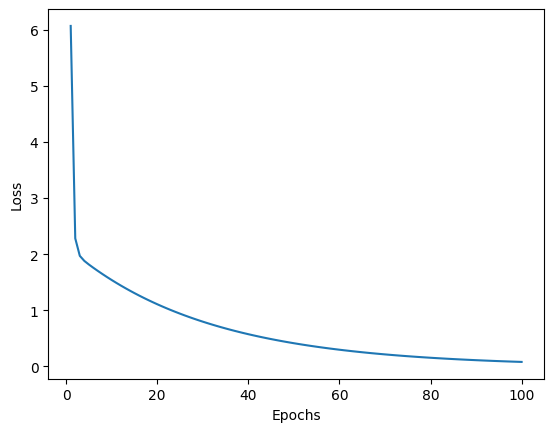

In [96]:
#ploting the Loss VS Epochs
eps=[ep for ep in range(1,epochs+1)]
print(losses)
plt.plot(eps,losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [97]:
#evaluating ...
predictions=[]
x_labels=[]
y_labels=[]
with torch.no_grad():
  model.eval()
  for idx,(x,y) in enumerate(dataloader):
    pred=model(x)

    x_labels.extend([xl.item() for xl in x])
    y_labels.extend(yl.item() for yl in y)
    predictions.extend(pl.item() for pl in pred)

print(f'Input labels: {x_labels}')
print(f'Output_labels: {y_labels}')
print(f'Predictions: {predictions}')


Input labels: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
Output_labels: [1.3333332538604736, 0.6666666269302368, 0.0, -0.6666667461395264, -1.3333334922790527, -2.0, -2.6666669845581055, -3.3333334922790527, -4.0, -4.6666669845581055]
Predictions: [1.0735877752304077, 0.43180763721466064, -0.20997250080108643, -0.8517526388168335, -1.4935327768325806, -2.135313034057617, -2.7770934104919434, -3.4188733100891113, -4.060653209686279, -4.7024335861206055]


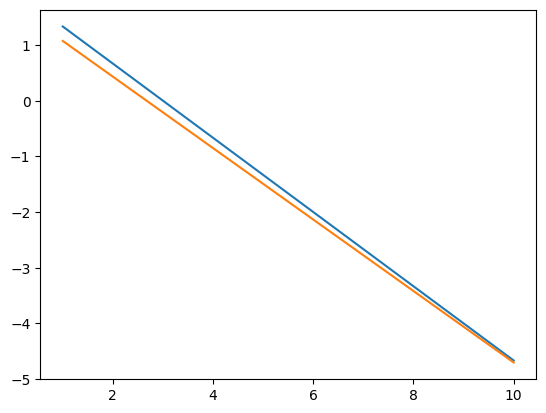

In [98]:
#plotting the output regression line...
plt.plot(x_labels,y_labels)
plt.plot(x_labels,predictions)
plt.show()

In [106]:
#conclusion....

with torch.no_grad():
  slope=model.fc1.weight.item()
  intercept=model.fc1.bias.item()

print(f'Original line equation is: Y = ({-0.6666})X + 2')
print(f'Resultant line equation is: Y = ({round(slope,4)})X + {round(intercept,2)}')




Original line equation is: Y = (-0.6666)X + 2
Resultant line equation is: Y = (-0.6418)X + 1.72
